# Name : Nivedita Chandra

**Data Science & Business Analytics Intern at The Sparks Foundation**


# Task : Prediction using Supervised ML

**Problem Statement: **Predict the marks obtained by the student based on the number of study hours.
** **




**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

**Importing Dataset**

In [2]:
# Reading data from the source location
data= pd.read_csv(r"C:\Users\Silvo\Desktop\docs\TSF projects\task1_data.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Summary Statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



** **
# Visualization of the Dataset

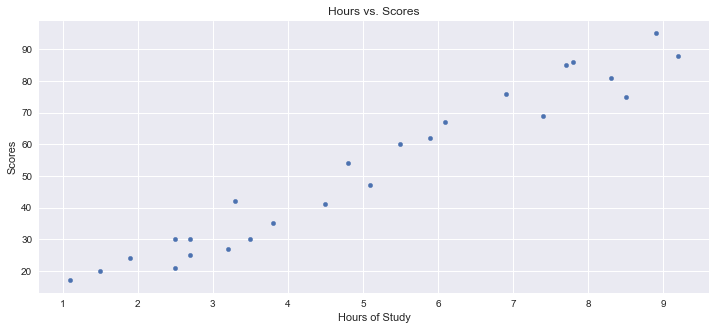

In [4]:
# Scatter plot of the given dataset
data.plot.scatter(x= 'Hours', y='Scores', figsize = (12,5))
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Hours vs. Scores')
plt.show()

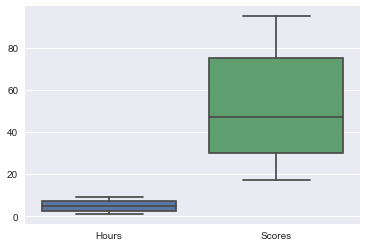

In [5]:
# Boxplot to check outliers
sns.boxplot(data= data)

**There is no outliers in Hours and Scores data.**

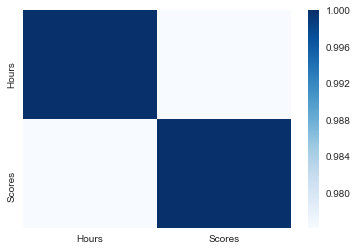

In [6]:
# Correlation plot
sns.heatmap(data.corr(),cmap='Blues')

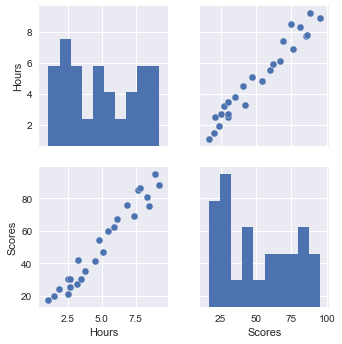

In [7]:
# Pairplot
sns.pairplot(data)

**From the above correlation plot and pairplot, we can conclude that Hours and Scores are correlated.**

** **
# Data Preprocessing

In [8]:
# Defining target variable and regressor
x= data.iloc[:,0].values
y= data.iloc[:,1].values

In [9]:
# Rearranging data to convert variables in 2D array
x= np.array(x).reshape(-1,1)
y= np.array(y).reshape(-1,1)

In [10]:
# Splitting the training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20)

** **
# Simple Linear Regression

In [11]:
# Fitting regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Computing the model coefficient and intercept
coeff= reg.coef_
print("Slope Coefficient:", coeff)
Intcpt= reg.intercept_
print("Intercept:", Intcpt)

Slope Coefficient: [[ 9.9244466]]
Intercept: [ 1.69150135]


**The fitted model is : y = 1.69 + 9.92*x**

In [13]:
# Predicting the test dataset
y_pred= reg.predict(x_test)
print(y_pred)

[[ 84.06440817]
 [ 16.57817125]
 [ 86.04929749]
 [ 90.01907613]
 [ 78.1097402 ]]


** **
# Plotting Regression Line

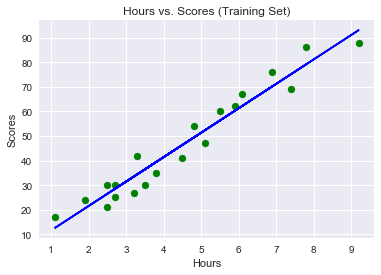

In [14]:
# Plotting training data
plt.scatter(x_train, y_train, color= 'green')
plt.plot(x_train, reg.predict(x_train), color= 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs. Scores (Training Set)')
plt.show()

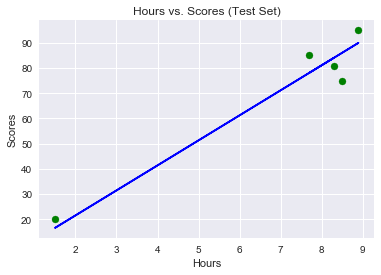

In [15]:
# Plotting testing data
plt.scatter(x_test, y_test, color= 'green')
plt.plot(x_test, reg.predict(x_test), color= 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs. Scores (Test Set)')
plt.show()

** **
# Prediction 

In [16]:
# Comparing Actual vs. Predicted Scores
df= pd.DataFrame({'Hours': x_test.flatten(), 'Actual_Scores': y_test.flatten(), 'Predicted_Scores': y_pred.flatten()}, columns= ['Hours', 'Actual_Scores', 'Predicted_Scores'])
df

,Hours,Actual_Scores,Predicted_Scores
0,8.3,81,84.064408
1,1.5,20,16.578171
2,8.5,75,86.049297
3,8.9,95,90.019076
4,7.7,85,78.109740


In [17]:
# Predicting the Score of a student who studies for 9.25 hours
Hours= 9.25
Hours= np.array(Hours).reshape(-1,1)
reg.predict(Hours)

array([[ 93.49263244]])

**Hence, the predicted marks of a student who studies for 9.25 hours is 93.49%.**

** **
# Model Evaluation
In order to evaluate the model, we compute the three commonly used metrics :<br /> 1) Mean Absolute Error <br /> 2) Mean Squared Error <br /> 3) Root Mean Square Error

In [18]:
# Computing Model Error 
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  5.88134361331
Mean Squared Error :  43.0943534
Root Mean Square Error :  6.56462896133


**The predicted model has low error value.**

In [19]:
#Computing Model Accuracy
print('R^2 : ', reg.score(x_test, y_test))

R^2 :  0.938239002809


**The predicted model is 93.82% accurate.**

# Thank You :)